<a href="https://colab.research.google.com/github/FrancescGiT/TEYMASA/blob/master/Copia_de_PrimeraRedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [ ]:
# CREAR EL DATASET

n = 500
p = 2

X, Y = make_circles(n_samples = n, factor=0.5, noise=0.03)

Y = Y[:,np.newaxis]

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:, 0] == 0, 1], c = "skyblue")
plt.scatter(X[Y[:, 0]==1,0], X[Y[:, 0]==1,1], c="salmon")
plt.axis("equal")
plt.show()

In [ ]:
# CLASE DE LA CAPA DE LA RED
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur) *2 - 1
    self.W = np.random.rand(n_conn, n_neur) *2 - 1


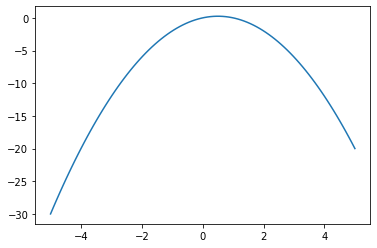

In [ ]:
# FUNCIONES DE ACTIVACION

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x* (1- x))

 # relu = lambda x: np.maximum(0,x)


_x = np.linspace(-5,5,100)
plt.plot(_x,sigm[1](_x))

In [ ]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4,8,sigm)

def create_nn(topology, act_f):
  
  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn


In [ ]:
topology = [p, 4,8,1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: (Yp-Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):

  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):

   z = out[-1][1] @ neural_net[l].W + neural_net[l].b
   a =  neural_net[l].act_f[0](z)

   out.append((z,a))
   
  print(l2_cost[0](out[-1][1], Y))

  if train:

    # Bacward pass
    deltas = []

    for l in reversed(range(0,len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) -1:
        #Calcular delta última capa.
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        #Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
    
      _W = neural_net[l].W

      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out [-1][1]



train(neural_net, X, Y, l2_cost, 0.5)
print("")

0.409004464016405



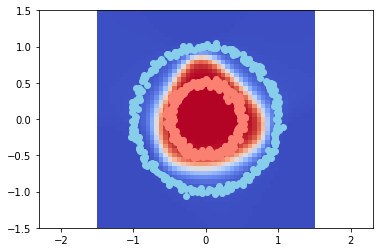

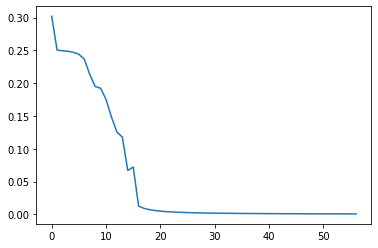

0.0006174814589809103
0.0006168234387041071
0.0006161667315374702
0.0006155113336613382
0.0006148572412706307
0.0006142044505747781
0.0006135529577976513
0.0006129027591774964
0.0006122538509668655
0.000611606229432549
0.0006109598908555092
0.0006103148315308134
0.000609671047767568
0.0006090285358888527
0.0006083872922316531
0.0006077473131468001
0.0006071085949988987
0.0006064711341662688
0.000605834927040879
0.000605199970028284
0.0006045662595475589
0.0006039337920312381
0.0006033025639252536
0.0006026725716888706
0.0006020438117946257
0.4999999374429567
0.4999999294936868
0.49999991742401845
0.49999989829747893
0.4999998662134458
0.4999998083051487
0.49999969381029113
0.4999994415393018
0.49999881561514004
0.4999970787228936
0.49999188743775197
0.49997639766504276
0.4999347459992097
0.49984290410938165
0.4996846954377102
0.4994686791405064
0.4992188959899441
0.49895200791360156
0.4986690985909836
0.4983622974906591
0.4980238151437346
0.4976518400045932
0.497253248614079
0.49684387

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
import time
from IPython.display import clear_output
neural_n = create_nn(topology, sigm)

loss = []

for i in range (2500):
  #Entramos en la red!
  pY = train(neural_n, X, Y, l2_cost, lr = 0.05)

  if i % 25 == 0:

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:, 0] == 0, 1], c = "skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:, 0] == 1, 1], c = "salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)
